 #  SPOTIFY DATASET(1920-2020)

We have more than 160k songs from the Spotify Web API from year 1920-2020. The dataset lists features like danceability, acousticness, loudness etc. for different songs along with their release year and popularity.

Dataset : We have more than 160k songs from the Spotify Web API from year 1920-2020. The dataset lists features like danceability, acousticness, loudness etc. for different songs along with their release year and popularity.

Business Problem : Since the feature trends for songs are changing overtime, we have tried analysing these trends. We predict popularity for the new songs based on these feature importances. It would help to figure out how a song would do when it hits the market and help musicians figure out the what kind of songs people stream most. Further, it can also be used to make content based recommender systems where songs can be clustered according to patterns in their audio features.

Machine Learning Problem : We have popularity range from 1-100. We will bin it into 10 categories and solve it as a multi-class classification problem. Then we cluster songs using clustering techniques to figure out the categories that have similar characteristics and can be used for recommendation systems.

## <font color=darkblue> DATA COLLECTION(1920-2020)<font> 

This dataset has been provided by Kaggle and can be downloaded from https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks. It has following features:
 - id (Id of track generated by Spotify)
 - acousticness (Ranges from 0 to 1)
 - danceability (Ranges from 0 to 1)
 - energy (Ranges from 0 to 1)
 - duration_ms (Integer typically ranging from 200k to 300k)
 - instrumentalness (Ranges from 0 to 1)
 - valence (Ranges from 0 to 1)
 - popularity (Ranges from 0 to 100)
 - tempo (Float typically ranging from 50 to 150)
 - liveness (Ranges from 0 to 1)
 - loudness (Float typically ranging from -60 to 0)
 - speechiness (Ranges from 0 to 1)
 - year (Ranges from 1921 to 2020)
 - mode (0 = Minor, 1 = Major)
 - explicit (0 = No explicit content, 1 = Explicit content)
 - key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
 - artists (List of artists mentioned)
 - release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
 - name (Name of the song)

## <font color=darkblue> EXPLORATORY DATA ANALYSIS <FONT>

In [83]:
#Importing libraries  

import numpy as np            
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,f1_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import SelectKBest,chi2,RFE

In [2]:
# Load the dataset
# Make the copy of dataset so that we don't loose original dataset once we make changes to working file

df = pd.read_csv('data.csv')                                       
df_copy = df.copy() 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
acousticness        169909 non-null float64
artists             169909 non-null object
danceability        169909 non-null float64
duration_ms         169909 non-null int64
energy              169909 non-null float64
explicit            169909 non-null int64
id                  169909 non-null object
instrumentalness    169909 non-null float64
key                 169909 non-null int64
liveness            169909 non-null float64
loudness            169909 non-null float64
mode                169909 non-null int64
name                169909 non-null object
popularity          169909 non-null int64
release_date        169909 non-null object
speechiness         169909 non-null float64
tempo               169909 non-null float64
valence             169909 non-null float64
year                169909 non-null int64
dtypes: float64(9), int64(6), object(4)
memory usage: 24.6+ MB


We have 3 types of data :
1. Categorical Features - Artists, id, name, release_date
2. Discrete Numerical Features - duration_ms, explicit, key, mode, popularity, year
3. Continuous Numerical Features - acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness,      tempo, valence

In [4]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [5]:
# Check for duplicated values
df.duplicated().value_counts()

False    169909
dtype: int64

We will create a Rating column to bin our popularity before proceeding so it would help us in better visualization.

In [6]:
# Define function to bin popularity
def popcat(x):
    if (x>=0)&(x<=10):
        return ('1')
    elif (x>=11)&(x<=20):
        return ('2')
    elif (x>=21)&(x<=30):
        return ('3')
    elif (x>=31)&(x<=40):
        return ('4')
    elif (x>=41)&(x<=50):
        return ('5')
    elif (x>=51)&(x<=60):
        return ('6')
    elif (x>=61)&(x<=70):
        return ('7')
    elif (x>=71)&(x<=80):
        return ('8')
    elif (x>=81)&(x<=90):
        return ('9')
    else:
        return ('10')

In [13]:
df['Rating'] = df['popularity'].apply(popcat)
df['Rating'] = df['Rating'].astype('int64')

## <font color=darkblue>UNIVARIATE ANALYSIS<font>

We will plot and see the individual characteristics of features in our dataset and check their distributions.

1     40468
5     29027
4     28300
3     23536
6     20241
2     12720
7     11801
8      3359
9       422
10       35
Name: Rating, dtype: int64


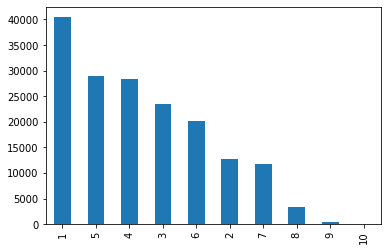

In [14]:
# Visualizaing the count plot for target class
print(df['Rating'].value_counts())
df['Rating'].value_counts().plot.bar()
plt.show()

We see there is a class imbalance in our dataset for the Rating. Number of songs keep decreasing as the popularity increases. Very few songs have a perfect rating of 10.

In [16]:
object_cols = [cols for cols in df if df[cols].dtypes=='O']
int_cols = [cols for cols in df if df[cols].dtypes=='int64']
float_cols = [cols for cols in df if df[cols].dtypes=='float64']

print('Categorical Columns :',object_cols)
print('Discrete Numerical Columns :',int_cols)
print('Continuous Numerical Columns :',float_cols)

Categorical Columns : ['artists', 'id', 'name', 'release_date']
Discrete Numerical Columns : ['duration_ms', 'explicit', 'key', 'mode', 'popularity', 'year', 'Rating']
Continuous Numerical Columns : ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


In [17]:
# Dispplay value counts for categorical columns

for features in df[object_cols]:
    print(features ,len(df[features].value_counts()))

artists 33375
id 169909
name 132940
release_date 10882


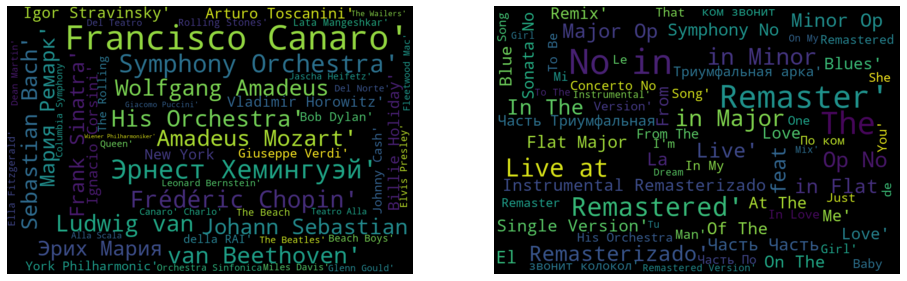

In [18]:
plt.figure(figsize=(16,8))
plt.subplot(121)
text1 = str(list(df['artists']))                                           # Converting artists column into string type
wordcloud = WordCloud(width=880,height=580,max_words=50).generate(text1)                         # Make worcloud object
plt.imshow(wordcloud,interpolation='bilinear')                                            # Display the generated image
plt.axis("off")
plt.margins(x=0, y=0)

plt.subplot(122)
text2 = str(list(df['name']))                                                # Converting names column into string type
wordcloud = WordCloud(width=880,height=580,max_font_size=75,max_words=70).generate(text2)       # Make worcloud object 
plt.imshow(wordcloud,interpolation='bilinear')                                            # Display the generated image
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

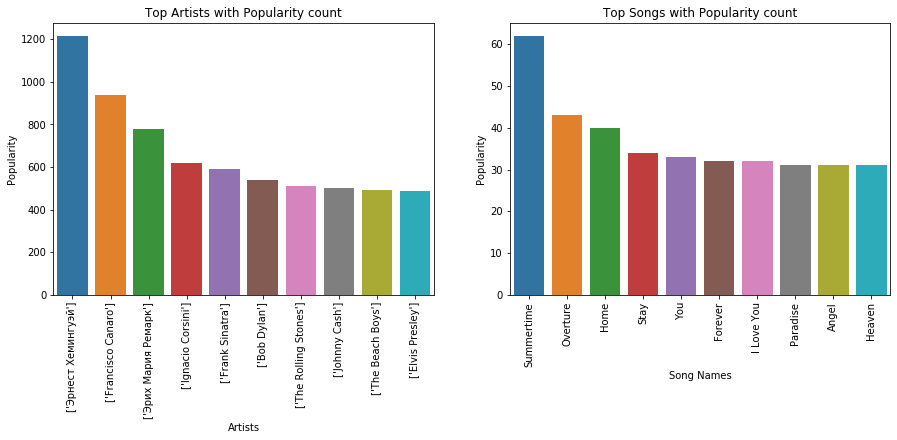

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(121)
x1 = df.groupby("artists")["popularity"].count().sort_values(ascending=False).head(10)
sns.barplot(x1.index, x1)
plt.title('Top Artists with Popularity count')
plt.ylabel('Popularity')
plt.xlabel('Artists')
plt.xticks(rotation = 90)

plt.subplot(122)
x2 = df.groupby("name")["popularity"].count().sort_values(ascending=False).head(10)
sns.barplot(x2.index, x2)
plt.title('Top Songs with Popularity count')
plt.ylabel('Popularity')
plt.xlabel('Song Names')
plt.xticks(rotation = 90)
plt.show()

The above barplot shows us the Top 10 artists and Top 10 Songs according to their popularity count. We have also displayed the Wordcloud of the artists and song names. 
We get similar results with both the wordcloud and barplots. But we will further try and analyse if the no of songs produced have an effect on popularity for an artist or a song in the next section.

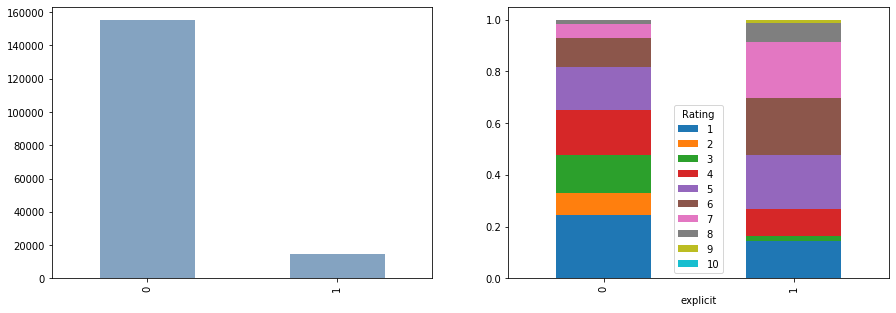

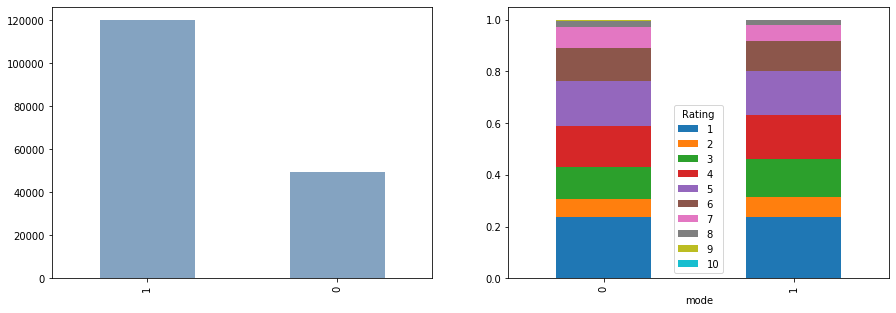

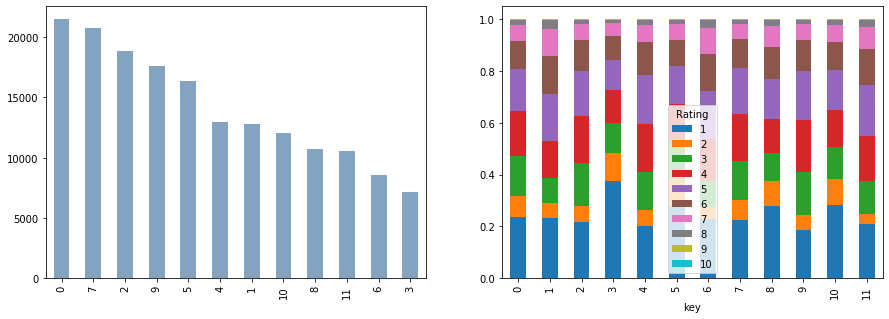

In [20]:
# Display independent discrete numerical Variables
for cols in ['explicit','mode','key']:
    
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    df[cols].value_counts().sort_values(ascending=False).plot.bar(color=(0.2, 0.4, 0.6, 0.6))
    
    ax=plt.subplot(122)
    Col = pd.crosstab(df[cols],df['Rating'])
    Col.div(Col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,ax=ax)
    
    plt.show()

- We observe that number of explicit 0 value counts is significantly higher explicit but most of explicit values 1 have a higher rating, most of their rating is above 5. We know our data has an imbalance and there are less songs with a higher rating. So the plot shows that better popularity songs have an explicit value of 1 compared to explicit value 0. 
- Major key value counts is also higher than minor key value counts but its effect on Rating is almost constant.
- Similar to key, Key has an imbalance in values but we cannot see any pattern of its effect on Rating. It fluctuates continuosusly. 

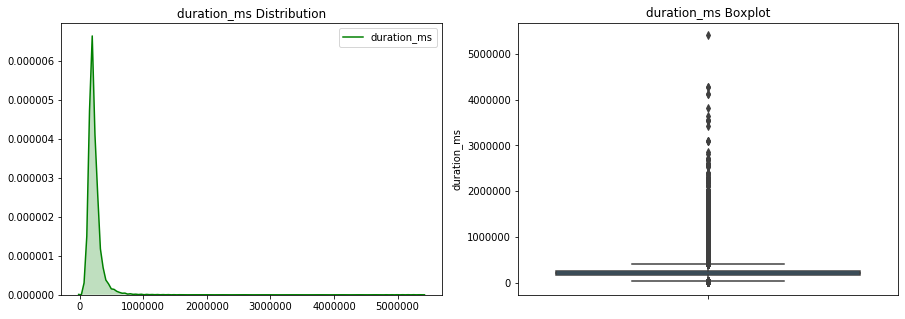

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.kdeplot(df['duration_ms'],shade=True,color='g')
plt.title('duration_ms Distribution')

plt.subplot(122)
sns.boxplot(y = df['duration_ms'])
plt.title('duration_ms Boxplot')
plt.show()

Duration time of the songs is right skewed, and their are many outliers in this column since songs produced can have huge variations when duration is considered in seconds. We will take care of this in sometime.

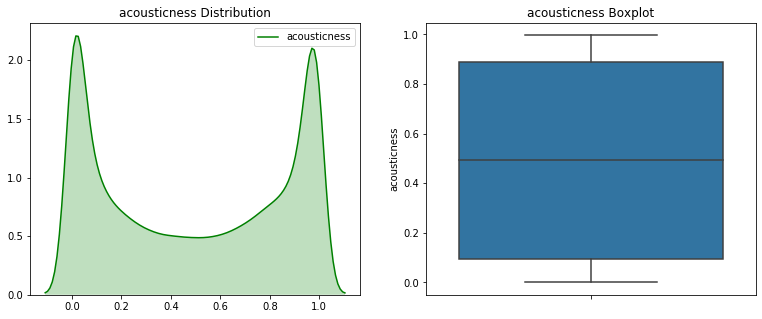

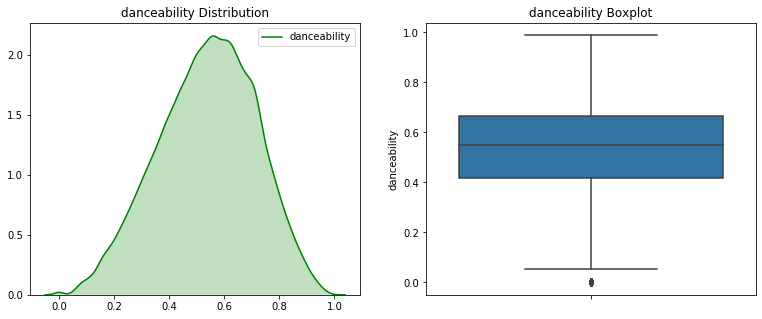

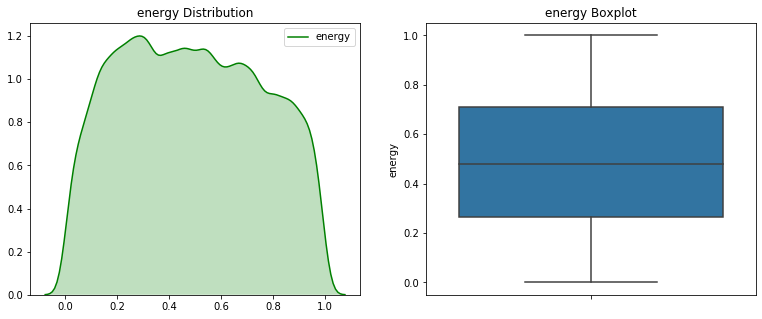

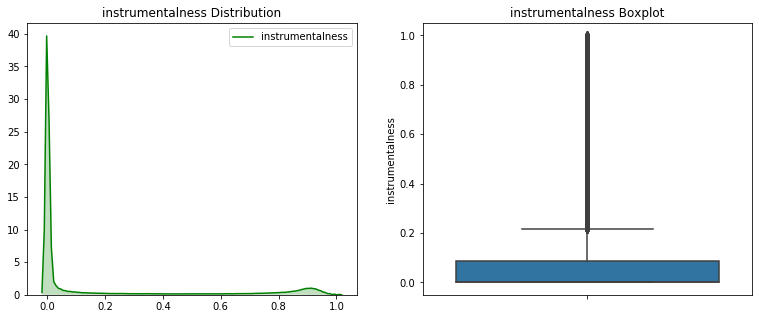

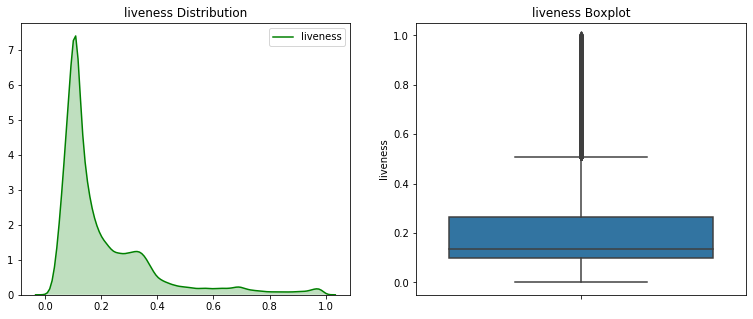

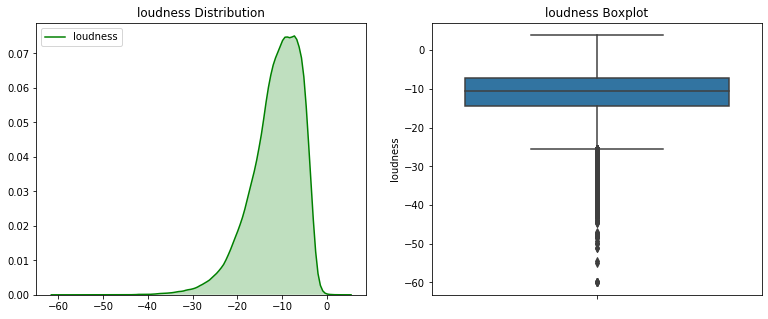

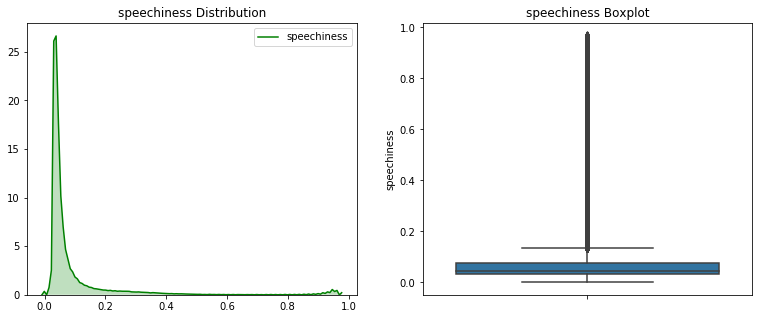

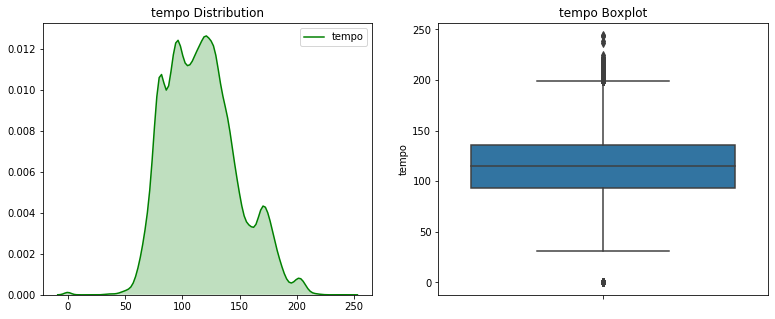

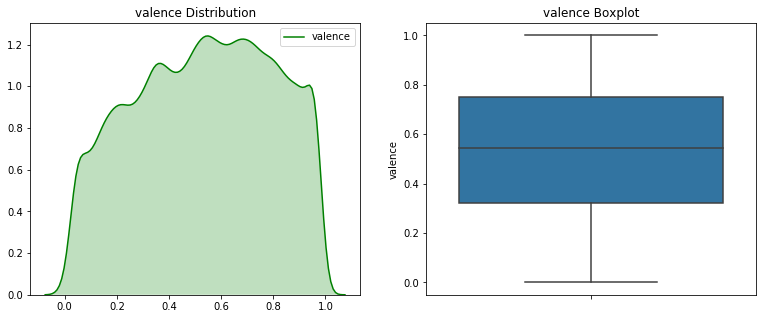

In [22]:
for cols in float_cols:
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[cols],shade=True,color='g')
    plt.title(cols+' Distribution')

    plt.subplot(122)
    sns.boxplot(y = df[cols])
    plt.title(cols+' Boxplot')
    plt.show()

For the continuous columns, we observe that :
1. Acousticness does not have much skew and there are no outliers in this column.
2. Danceability has a slight negative skew,and there are very few outliers near 0. 
3. Energy distribution has no outliers and has an almost even spread.
4. Instrumentalness is right skewed and has a large number of outliers.
5. Liveness is also right skewed and has a large number of outliers.
6. Loudness is left skewed and many outliers.
7. Speechiness has right skew and large number of outliers.
8. Tempo distribution is comparatively less skewed and has few outliers.
9. Valence distribution is almost similar to energy, with an almost even spread and no outliers.

## <font color=darkblue>BIVARIATE ANALYSIS<font>

We have seen the individual distribution of the variables. We will now compare our independent variables with our dependent variable i.e.popularity and check the correlation between different features. 

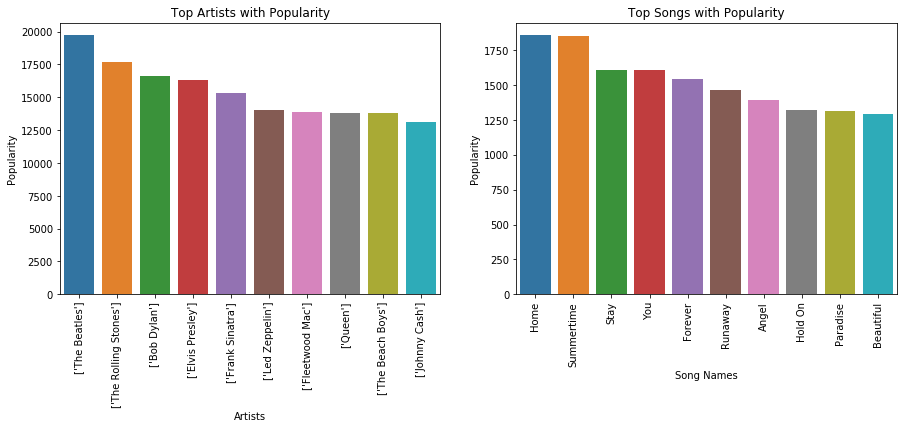

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(121)
x1 = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(10)
sns.barplot(x1.index, x1)
plt.title('Top Artists with Popularity')
plt.ylabel('Popularity')
plt.xlabel('Artists')
plt.xticks(rotation = 90)

plt.subplot(122)
x2 = df.groupby("name")["popularity"].sum().sort_values(ascending=False).head(10)
sns.barplot(x2.index, x2)
plt.title('Top Songs with Popularity')
plt.ylabel('Popularity')
plt.xlabel('Song Names')
plt.xticks(rotation = 90)
plt.show()

Here, we compare artists based on the sum of their total popularity scores. It is interesting to note here that we can see some popularity wise top artists like Bob Dylan, Frank Sinatra, Johnny Cash in the Wordcloud but they do not have the highest frequency of the songs produced in wordcloud. Similar is the case with lyrics of the songs. Not the most popular song lyrics frequently occur in the wordcloud. 

This makes sense since we have many different kind of songs produced with similiar lyrics all the time, and number of artists release their albums frequently, but that does not guarantee its going to be popular. So, the frequency of a song or atist does not have a large impact on its popularity. When we determine the relationship between these 2 independent variables with popularity, we will have to consider their sum/average of popularity. 

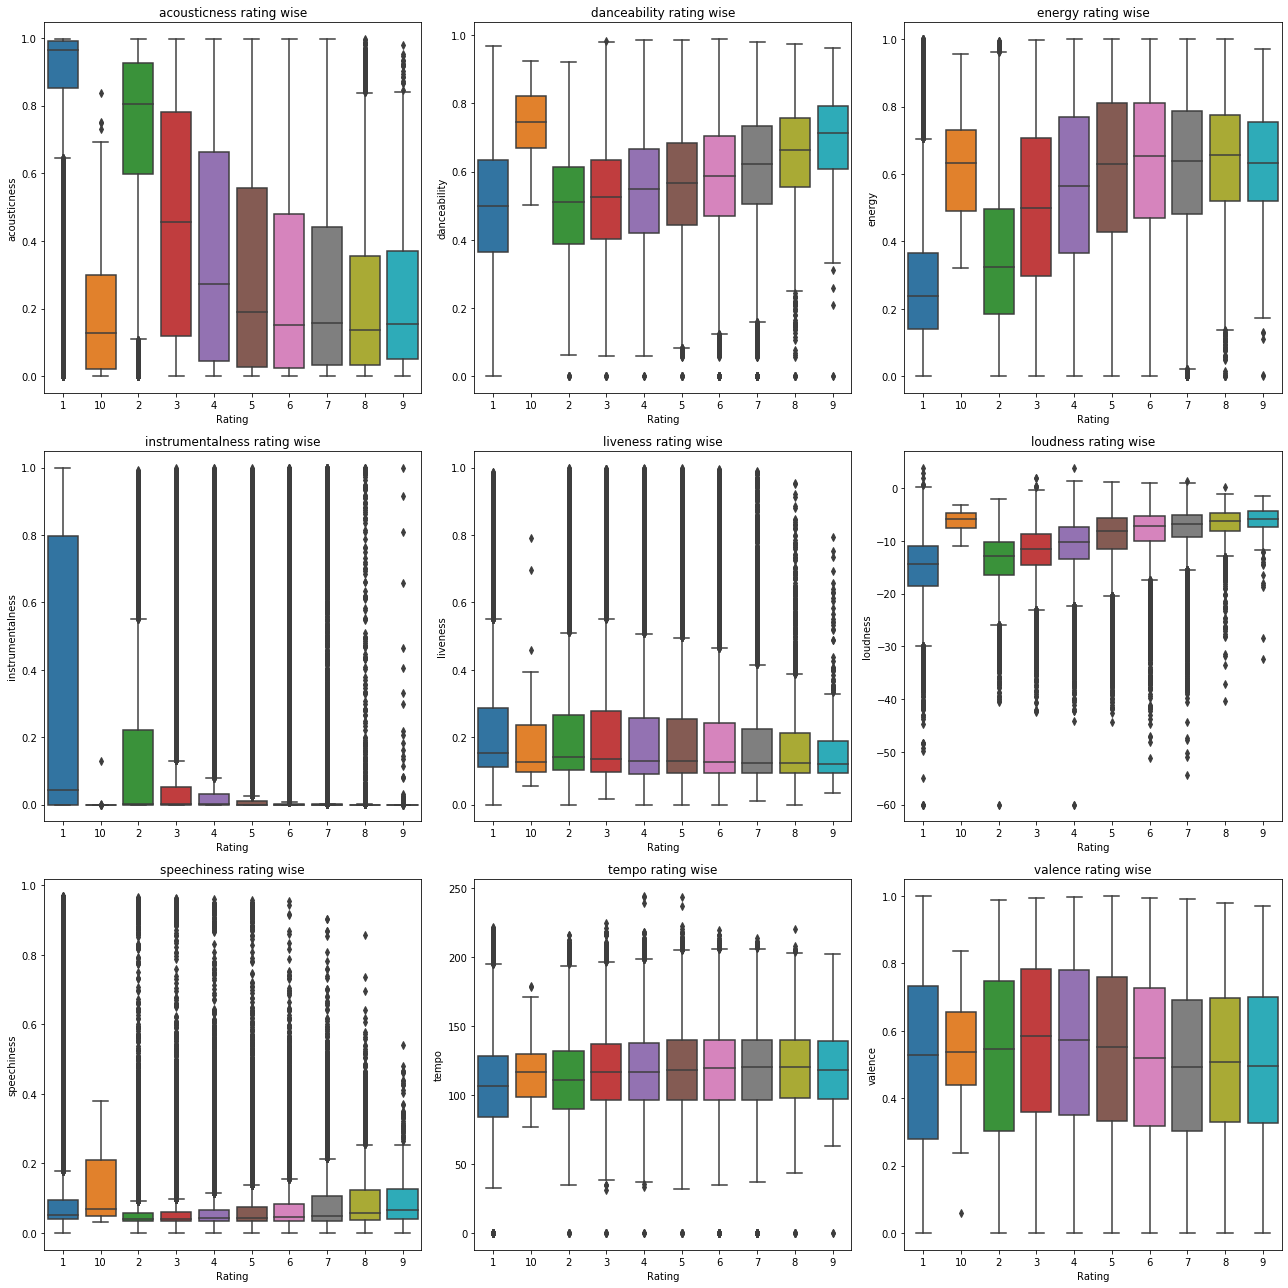

In [26]:
rows=3
columns=3
fig=plt.figure(figsize=(18,18))
for i,cols in enumerate(float_cols):
    plt.subplot(rows,columns,i+1)
    sns.boxplot(x='Rating',y=cols,data=df)
    plt.title(cols+' rating wise')
fig.tight_layout()
plt.show()

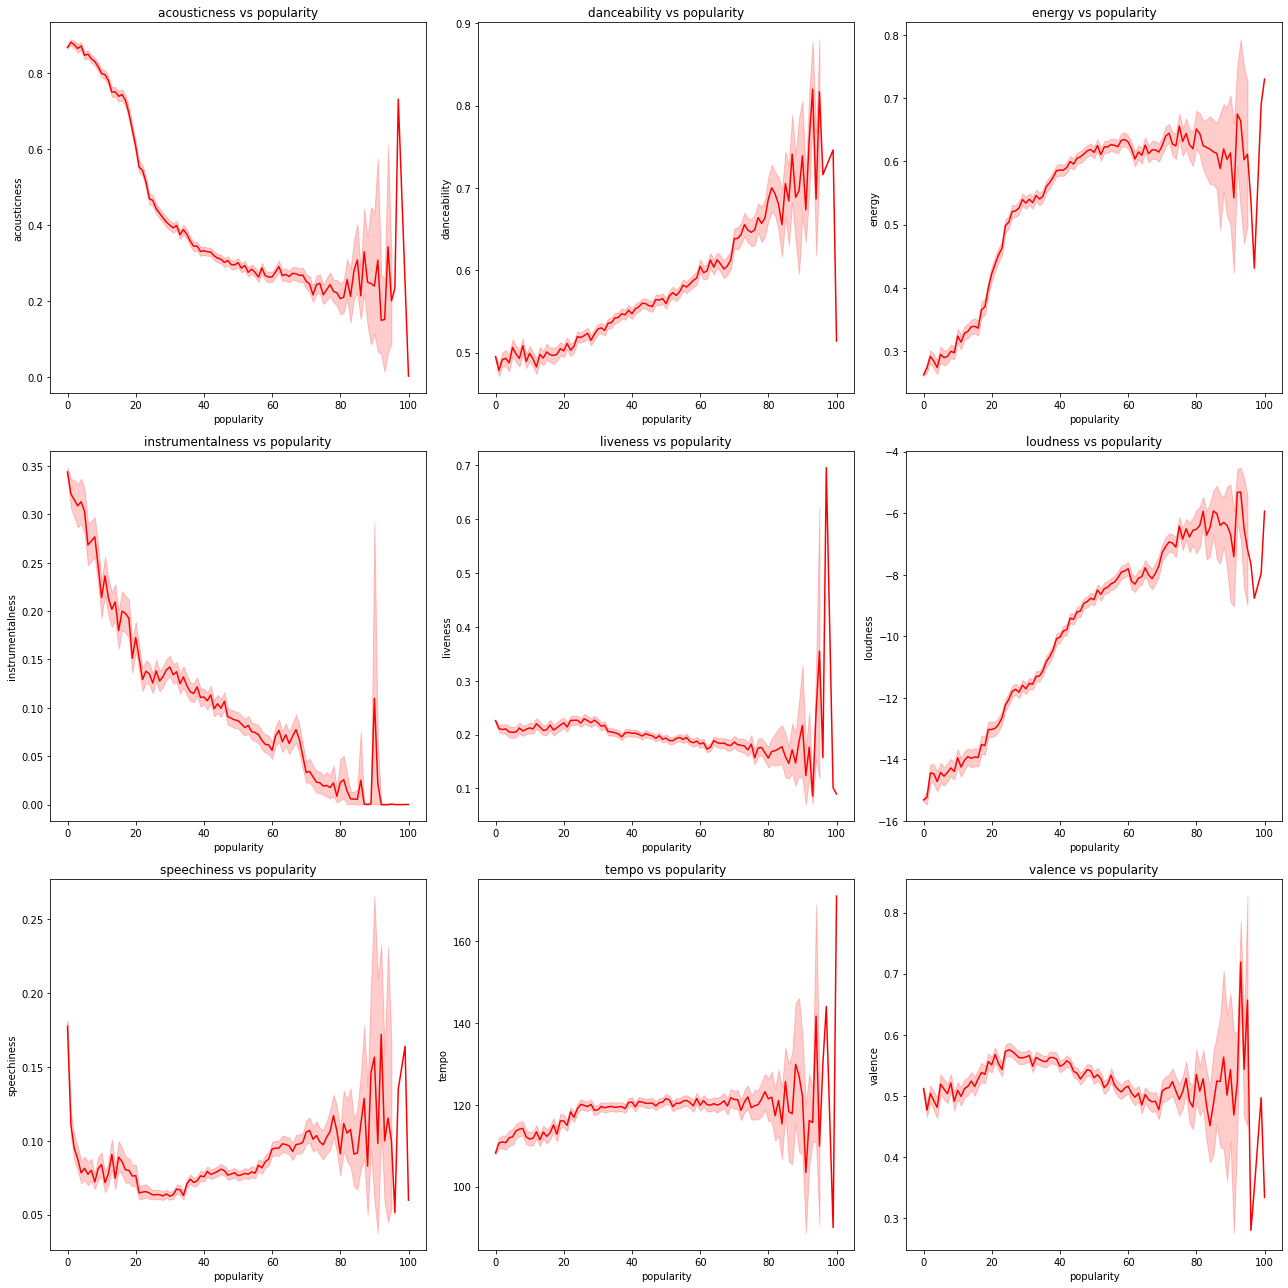

In [27]:
rows=3
columns=3
fig=plt.figure(figsize=(18,18))
for i,cols in enumerate(float_cols):
    plt.subplot(rows,columns,i+1)
    sns.lineplot(x='popularity',y=cols,data=df,color='r')
    plt.title(cols+' vs popularity')
fig.tight_layout()
plt.show()

By comparing audio features with our dependent variable i.e.popularity, we have the following observations:
1. As the acousticness of a song decreases, its popularity increases and at high popularity values, there is higher variation. It signifies for the most part, acoustic has an inverse relationship with popularity of a song. Also, most of the outliers lie in Rating class 1.
2. As the danceability of the song increases, its popularity values increases. Thus, people are likely to prefer songs which they can dance with.Outliers also increase on the higher danceability value.
3. Popularity of a song also increases as the energy of the song increases. This follows the same analogy to danceability, people prefer songs which have high energy. Higher rating has more outliers.
4. Instrumentalness has a visible inverse relationship with popularity. This does not really follow any reasonable aspect, it's probably a data insight in general.It has high number of outliers throughout.
5. Loudness has a similar curve to danceability and energy and thus, plays an important role in determining the outcome for popularity. It again has large number of outliers.
6. We do not see any particularly strong visible relationship of popularity with liveness, speechiness, tempo and valence.

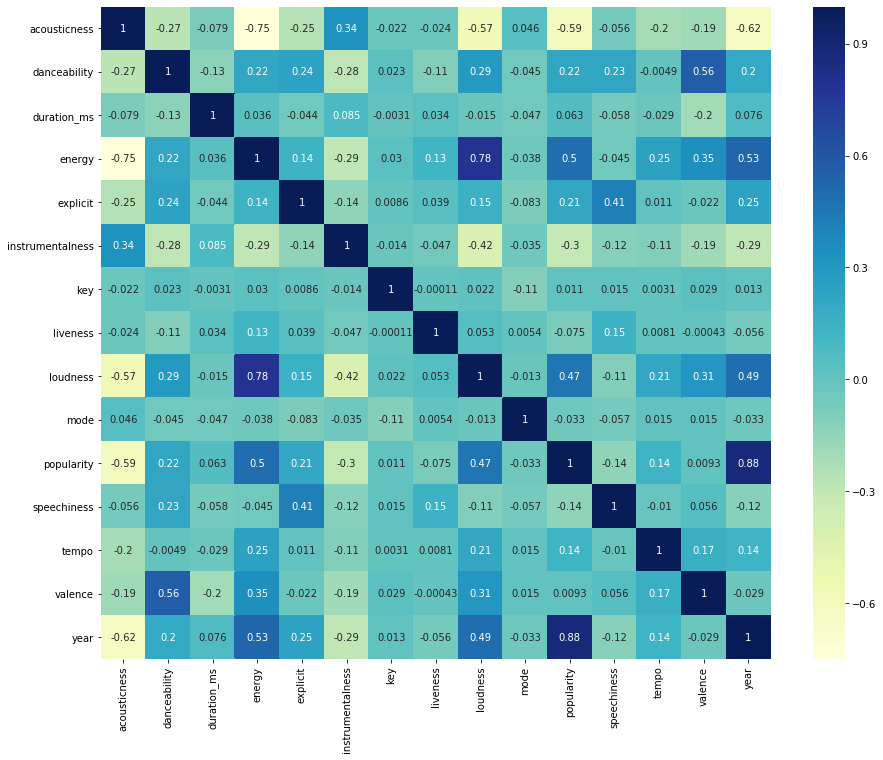

In [29]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
b,t=plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.show()

From the heatmap, we see that acousticness, energy, loudness, and year have most correlation with popularity. These features play the most important role in determining the popularity of a given song.

## <font color=darkblue>DATA PROCESSING<font>

We have different range for our audio features. In this part, we will try to scale those features and try reducing the outliers in our dataset. Further, we have to remove columns which do not add value to our model.

In [24]:
# We convert seconds to minutes for better interpretation 
df['duration_ms'] = df['duration_ms']/60000

In [25]:
# Display the skewness of data

df.skew()

acousticness        0.008720
danceability       -0.212896
duration_ms         6.489527
energy              0.077368
explicit            2.979359
instrumentalness    1.681509
key                 0.004956
liveness            2.145796
loudness           -1.071208
mode               -0.917891
popularity         -0.021527
speechiness         4.235813
tempo               0.448567
valence            -0.124010
year               -0.132748
Rating              0.132581
dtype: float64

Since, there is a skew in our data, we will use PowerTransformer and scale our data to reduce the skewness and reduce the number of outliers.

In [26]:
# Apply transformation 
pt = PowerTransformer(method='yeo-johnson', standardize=True) 
df_scaled = pd.DataFrame(pt.fit_transform(df[['duration_ms','instrumentalness','liveness','speechiness','loudness']]), 
                           columns=['duration_ms','instrumentalness','liveness','speechiness','loudness'])

In [27]:
df_scaled.min()

duration_ms        -5.816473
instrumentalness   -0.630486
liveness           -2.870411
speechiness        -2.744239
loudness           -4.407749
dtype: float64

In [28]:
df_scaled.skew()

duration_ms        -0.084881
instrumentalness    1.163562
liveness            0.327066
speechiness         0.950062
loudness            0.010805
dtype: float64

We will plot original distributions against scaled distributions to check if the skew reduces.

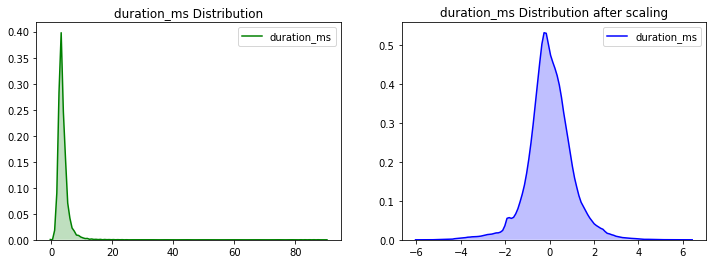

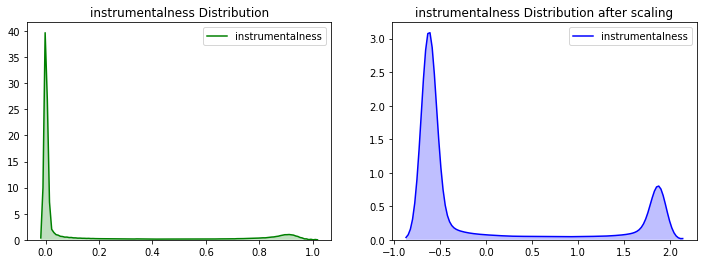

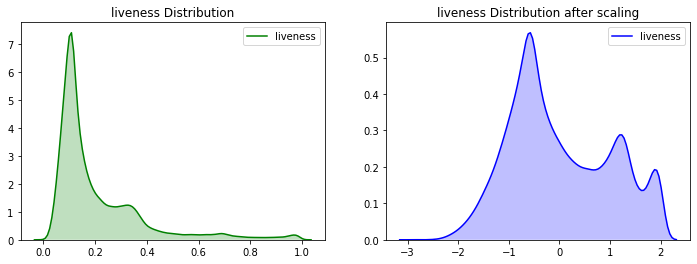

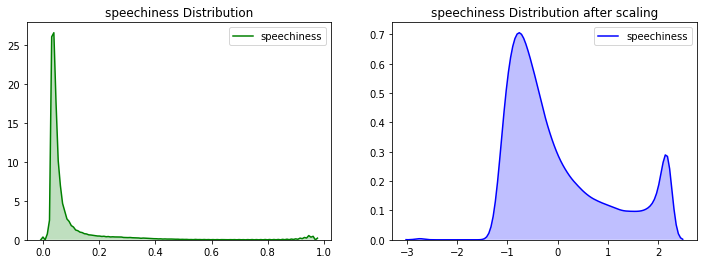

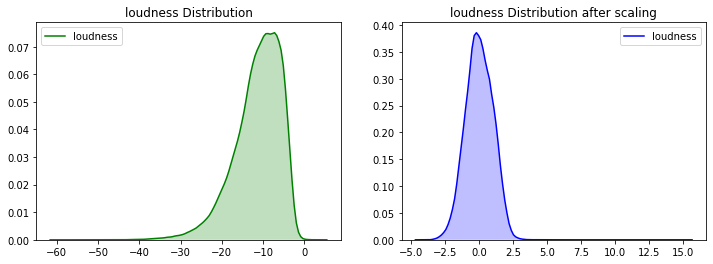

In [29]:
cols = ['duration_ms','instrumentalness','liveness','speechiness','loudness']
for col in cols:
    plt.figure(figsize=(12,4))
    
    plt.subplot(121)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.title(col+' Distribution')

    plt.subplot(122)
    sns.kdeplot(df_scaled[col],color='b',shade=True)
    plt.title(col+' Distribution after scaling')
    
    plt.show()

We see significant difference in the normality of the features. Hence, we will replace the original columns of our DataFrame with the new scaled features.

In [30]:
# Convert transformed values to positive scale
df['duration_ms']      = round((df_scaled['duration_ms']+6),3)
df['instrumentalness'] = round((df_scaled['instrumentalness']+1),3)
df['liveness']         = round((df_scaled['liveness']+3),3)
df['speechiness']      = round((df_scaled['speechiness']+3),3)
df['loudness']         = round((df_scaled['loudness']+5),3)

In [31]:
# Drop Id since it is a randomly generated Id for every track added.
df.drop('id',axis=1,inplace=True)

In [32]:
# Check duplicates again
df.duplicated().value_counts()

False    169321
True        588
dtype: int64

After dropping id column, we see that some songs were repeated. So we remove those values.

In [33]:
# Drop duplicated values 
df.drop_duplicates(keep='first',inplace=True)

In [34]:
df.duplicated().value_counts()

False    169321
dtype: int64

In [35]:
# We convert release_date to year and delete it since we have that information in year column already.
df['release_date'] = df['release_date'].str[:4]
df['release_date'] = df['release_date'].astype('int')
print(len(df[df['release_date']!=df['year']]['year']))

0


In [36]:
df.drop('release_date',axis=1,inplace=True)

## <font color=darkblue>FEATURE ENGINEERING<font>

In [43]:
df['name'].nunique()

132940

In [44]:
df['artists'].nunique()

33375

We have 2 categorical features in our dataset i.e.artists and names of song which would result in high dimensionality if we apply one-hot encoding. We can apply labelencoder but that would assign numerical value to our variables alphabetically. That won't make sense since an artist name that starts from A would be assigned a value of 1, irrespective of the popularity value of that particular artist. 

Here, we will group our data by names and artists separately, and assign their average popularity values as artist_rank and name_rank respectively, which would replace their values in the original DataFrame.

In [37]:
# Make a dataframe grouping and ranking names by popularity

name = df.groupby("name")["popularity"].mean().sort_values().reset_index()
name.rename(columns={'popularity':'name_rank'},inplace=True)
name.head()

,name,name_rank
0,"Holi Khelibe Giridhari, Pt. 1",0.0
1,Dolor Gaucho - Remasterizado,0.0
2,Miss Annabelle Lee,0.0
3,Vitamina B - Remastered,0.0
4,Miss Elizabeth Brown,0.0


In [38]:
# Make a dataframe grouping and ranking artists by popularity

artist = df.groupby("artists")["popularity"].mean().sort_values().reset_index()
artist.rename(columns={'popularity':'artist_rank'},inplace=True)
artist.head()

,artists,artist_rank
0,['The Orchestra Nepolitan'],0.0
1,['N. Lalitha'],0.0
2,['N. Maldacea Jr'],0.0
3,['N. Mosxonas'],0.0
4,"['Frédéric Chopin', 'William Kapell']",0.0


In [39]:
# Create a dictionary to create mapping values
name_map   = dict(name[['name', 'name_rank']].values)
artist_map = dict(artist[['artists', 'artist_rank']].values)

#map name and artist to their ranks
df['name_rank']   = df['name'].map(name_map)
df['artist_rank'] = df['artists'].map(artist_map)

In [40]:
# Drop name and artist columns
df = df.drop(['artists','name'],axis=1)

# Create a copy of final df
final_df = df.copy()

# Display df
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,Rating,name_rank,artist_rank
0,0.995,0.708,5.283,0.1950,0,2.813,10,2.948,4.641,1,0,2.836,118.469,0.7790,1928,1,0.0,0.000000
1,0.994,0.379,6.719,0.0135,0,2.890,8,1.891,2.707,1,0,2.683,83.972,0.0767,1928,1,0.0,6.406250
2,0.604,0.749,4.252,0.2200,0,0.370,5,2.555,3.590,0,0,5.212,107.177,0.8800,1928,1,0.0,0.000000
3,0.995,0.781,5.610,0.1300,0,2.889,1,2.443,4.277,0,0,3.887,108.003,0.7200,1928,1,0.0,0.041578
4,0.990,0.210,8.782,0.2040,0,2.891,11,2.251,3.981,1,1,2.542,62.149,0.0693,1928,1,0.2,2.417219


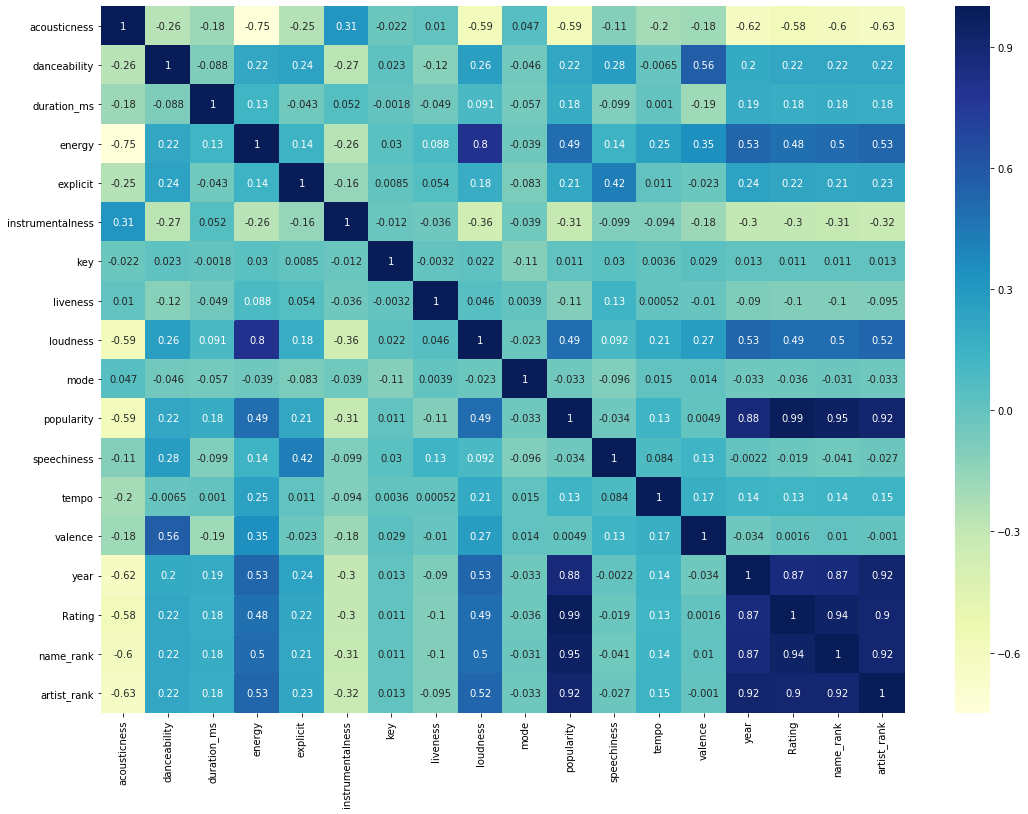

In [41]:
plt.figure(figsize=(18,13))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
b,t=plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.show()

We see that popularity has a high correlation with our artist and name column now. Hence, would help us in generating better insights.

In [42]:
# Drop popularity column since we are going to work with Rating.
df.drop('popularity',axis=1,inplace=True)

# <font color=darkblue>MODEL BUILDING - PART 1<font>

We will build basic classification models on the complete dataset in this part

In [43]:
# Define x and y and split data into train and test. We will train our model on train data and evaluate it using test

x = df.drop('Rating',axis=1)
y = df['Rating']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

Since we have 10 classes, it is possible that our model is performing better for one class and equally bad for another, so we use f1 score since it uses Harmonic mean and gives weightage to lower values in determining the overall score. We are analysing our models on overall accuracy and F1 score here before proceeding with the in-depth analysis of our classes.

## <font color=Royalblue>KNN<font>

In [44]:
# Scaling data to apply classification models

ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train),columns = x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns = x_test.columns)

In [45]:
# Fit the train data on KNN Classifier

knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
y_pred_knn = knn.predict(x_test_scaled)

In [48]:
# Print test accuracy and F1 score

print('KNN accuracy score : ', round(accuracy_score(y_test,y_pred_knn)*100,3),'%')
print('KNN F1 score       : ', round(f1_score(y_test,y_pred_knn,average='weighted')*100,3),'%')

KNN accuracy score :  56.578 %
KNN F1 score       :  55.938 %


## <font color=Royalblue>Naive-Bayes<font>

In [49]:
# Fit scaled data on Naive-Bayes Classifier

nb = GaussianNB()
nb.fit(x_train_scaled,y_train)
y_pred_nb = nb.predict(x_test_scaled)

In [50]:
# Print test accuracy and F1 score

print('Naive-Bayes accuracy score : ', round(accuracy_score(y_test,y_pred_nb)*100,3),'%')
print('Naive-Bayes F1 score       : ', round(f1_score(y_test,y_pred_nb,average='weighted')*100,3),'%')

Naive-Bayes accuracy score :  61.421 %
Naive-Bayes F1 score       :  61.921 %


## <font color=Royalblue>Random Forest<font>

In [51]:
# Fit train data on Random Forest Classifier

rf = RandomForestClassifier(random_state=3)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [52]:
# Print test accuracy score and F1 score

print('Random Forest accuracy score : ', round(accuracy_score(y_test,y_pred_rf)*100,3),'%')
print('Random Forest F1 score       : ', round(f1_score(y_test,y_pred_rf,average='weighted')*100,3),'%')

Random Forest accuracy score :  82.084 %
Random Forest F1 score       :  82.099 %


## <font color=Royalblue>XGBoost<font>

In [53]:
# Fit train data on XGBoost

xg = xgb.XGBClassifier(random_state=3)
xg.fit(x_train,y_train)
y_pred_xg = xg.predict(x_test)

In [54]:
# Print test accuracy score and F1 score

print('XGBoost accuracy score : ', round(accuracy_score(y_test,y_pred_xg)*100,3),'%')
print('XGBoost F1 score       : ', round(f1_score(y_test,y_pred_xg,average='weighted')*100,3),'%')

XGBoost accuracy score :  83.499 %
XGBoost F1 score       :  83.503 %


Both Random Forest and XGBoost Classifier are giving reasonably good accuracy and F1 score for the overall model, let's see which is performing better for all classes separately.

In [55]:
# Print classification report for Random Forest and XGBoost

print('Classification report for Random Forest :\n')
print(classification_report(y_test,y_pred_rf))
print('Classification report for XGBoost :\n')
print(classification_report(y_test,y_pred_xg))

Classification report for Random Forest :

              precision    recall  f1-score   support

           1       0.97      0.96      0.96     12017
           2       0.76      0.76      0.76      3760
           3       0.83      0.76      0.79      7036
           4       0.78      0.80      0.79      8506
           5       0.75      0.81      0.78      8671
           6       0.75      0.77      0.76      6048
           7       0.82      0.75      0.79      3604
           8       0.84      0.65      0.73      1013
           9       0.85      0.55      0.67       134
          10       0.20      0.12      0.15         8

    accuracy                           0.82     50797
   macro avg       0.75      0.69      0.72     50797
weighted avg       0.82      0.82      0.82     50797

Classification report for XGBoost :

              precision    recall  f1-score   support

           1       0.97      0.96      0.97     12017
           2       0.77      0.79      0.78      376

We can see from the classification reports of both XGBoost and Random Forest that for class 10, which has lowest number of values in the original dataset, XGBoost is performing better than Random Forest, so we will select XGBoost as the optimum model for this part and analyze the errors for each of the Rating class separately.

# <font color=Darkblue>MODEL BUILDING - PART 2<font>

## <font color=Royalblue>Handling Imbalanced Data<font>

Since we have huge Imbalance in our target column, we will balance our dataset using 2 techniques :
1. NearMiss : NearMiss is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples. When instances of two different classes are very close to each other, we remove the instances of the majority class to increase the spaces between the two classes.

2. SMOTE : SMOTE stands for Synthetic Minority Over-sampling Technique. SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class. SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.

### <font color=Royalblue>NearMiss (UnderSampling)<font>

10    27
9     27
8     27
7     27
6     27
5     27
4     27
3     27
2     27
1     27
Name: Rating, dtype: int64


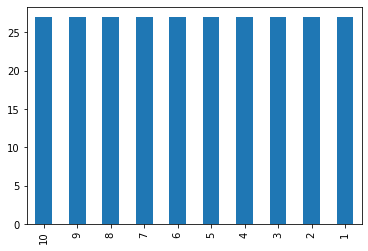

In [63]:
# Create samples using NearMiss from train data

x_nm, y_nm = nr.fit_sample(x_train,y_train)
print(y_nm.value_counts())
y_nm.value_counts().plot.bar()

NearMiss has undersampled our data into equal number of Rating value counts. We will train both Random Forest and XGBoost on the NearMiss samples and check their performance. The sample we created from NearMiss have been taken only from train data because we don't want model to see the test data. We will check our performance on the same test data throughout the file so we get results uniformly.

### Random Forest

In [58]:
# Fit sampled train data on Random Forest Classifier

rf = RandomForestClassifier(random_state=3)
rf.fit(x_nm,y_nm)
y_pred_rf = rf.predict(x_test)

In [59]:
# Print test accuracy score and F1 score for NearMiss sample

print('Random Forest accuracy score : ', round(accuracy_score(y_test,y_pred_rf)*100,3),'%')
print('Random Forest F1 score       : ', round(f1_score(y_test,y_pred_rf,average='weighted')*100,3),'%')

Random Forest accuracy score :  10.916 %
Random Forest F1 score       :  6.348 %


### XGBoost

In [61]:
# Fit Sample train data on XGBoost

xg = xgb.XGBClassifier(random_state=3)
xg.fit(x_nm,y_nm)
y_pred_xg = xg.predict(x_test)

In [62]:
# Print test accuracy score and F1 score

print('XGBoost accuracy score : ', round(accuracy_score(y_test,y_pred_xg)*100,3),'%')
print('XGBoost F1 score       : ', round(f1_score(y_test,y_pred_xg,average='weighted')*100,3),'%')

XGBoost accuracy score :  13.538 %
XGBoost F1 score       :  9.412 %


Both Random Forest and XGBoost are giving a very bad accuracy. This could be due to the fact that we did not have enough data to train our models. All the class samples were reduced to 27 values each giving us a total sample size of 270. We obviously would need more data to better train our model. 

### <font color=Royalblue>SMOTE (OverSampling)<font>

10    27896
9     27896
8     27896
7     27896
6     27896
5     27896
4     27896
3     27896
2     27896
1     27896
Name: Rating, dtype: int64


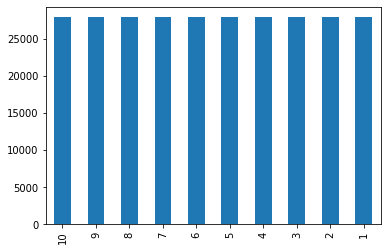

In [64]:
# Create samples using SMOTE from train data

smt = SMOTE()
x_smt,y_smt = smt.fit_sample(x_train,y_train)
print(y_smt.value_counts())
y_smt.value_counts().plot.bar()

SMOTE has oversampled our data into equal value counts for rating column. We will train our models on this data and see the performance of model again on the unseen test data for evaluation.

### Random Forest

In [65]:
# Fit sampled train data on Random Forest Classifier

rf = RandomForestClassifier(random_state=3)
rf.fit(x_smt,y_smt)
y_pred_rf = rf.predict(x_test)

In [66]:
# Print test accuracy score and F1 score for NearMiss sample

print('Random Forest accuracy score : ', round(accuracy_score(y_test,y_pred_rf)*100,3),'%')
print('Random Forest F1 score       : ', round(f1_score(y_test,y_pred_rf,average='weighted')*100,3),'%')

Random Forest accuracy score :  81.623 %
Random Forest F1 score       :  81.709 %


### XGBoost

In [67]:
# Fit Sample train data on XGBoost

xg = xgb.XGBClassifier(random_state=3)
xg.fit(x_smt,y_smt)
y_pred_xg = xg.predict(x_test)

In [68]:
# Print test accuracy score and F1 score

print('XGBoost accuracy score : ', round(accuracy_score(y_test,y_pred_xg)*100,3),'%')
print('XGBoost F1 score       : ', round(f1_score(y_test,y_pred_xg,average='weighted')*100,3),'%')

XGBoost accuracy score :  82.918 %
XGBoost F1 score       :  83.013 %


Both Random Forest and XGBoost are giving good accuracy, we can see if the class-wise performance for rating has improved after balancing data.

In [69]:
# Print classification report for Random Forest and XGBoost

print('Classification report for Random Forest :\n')
print(classification_report(y_test,y_pred_rf))
print('Classification report for XGBoost :\n')
print(classification_report(y_test,y_pred_xg))

Classification report for Random Forest :

              precision    recall  f1-score   support

           1       0.98      0.94      0.96     12017
           2       0.70      0.80      0.75      3760
           3       0.83      0.76      0.79      7036
           4       0.78      0.79      0.79      8506
           5       0.75      0.80      0.78      8671
           6       0.75      0.76      0.76      6048
           7       0.80      0.76      0.78      3604
           8       0.74      0.67      0.70      1013
           9       0.72      0.58      0.64       134
          10       0.29      0.25      0.27         8

    accuracy                           0.82     50797
   macro avg       0.73      0.71      0.72     50797
weighted avg       0.82      0.82      0.82     50797

Classification report for XGBoost :

              precision    recall  f1-score   support

           1       0.98      0.95      0.96     12017
           2       0.71      0.82      0.76      376

Average F1 for minority class has decreased to 0.35 from 0.45 in the previous model, and gives an almost similar result to previous model. SO we would go ahead with the original model before applying oversampling.

# <font color=darkblue>MODEL BUILDING - PART 3<font>

## <font color=Royalblue>Feature Selection<font>

In this section, we would apply 3 feature selection techniques:
1. Pearson Correaltion : In this method, filtering is done using correlation matrix and it is commonly done using Pearson correlation.
2. Recursive Feature Selection : Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.
3. SelectKBest : SelectKBest scores the features against the target variable using a function and then retains the most significant features.

### <font color=Royalblue>Pearson Correlation<font>

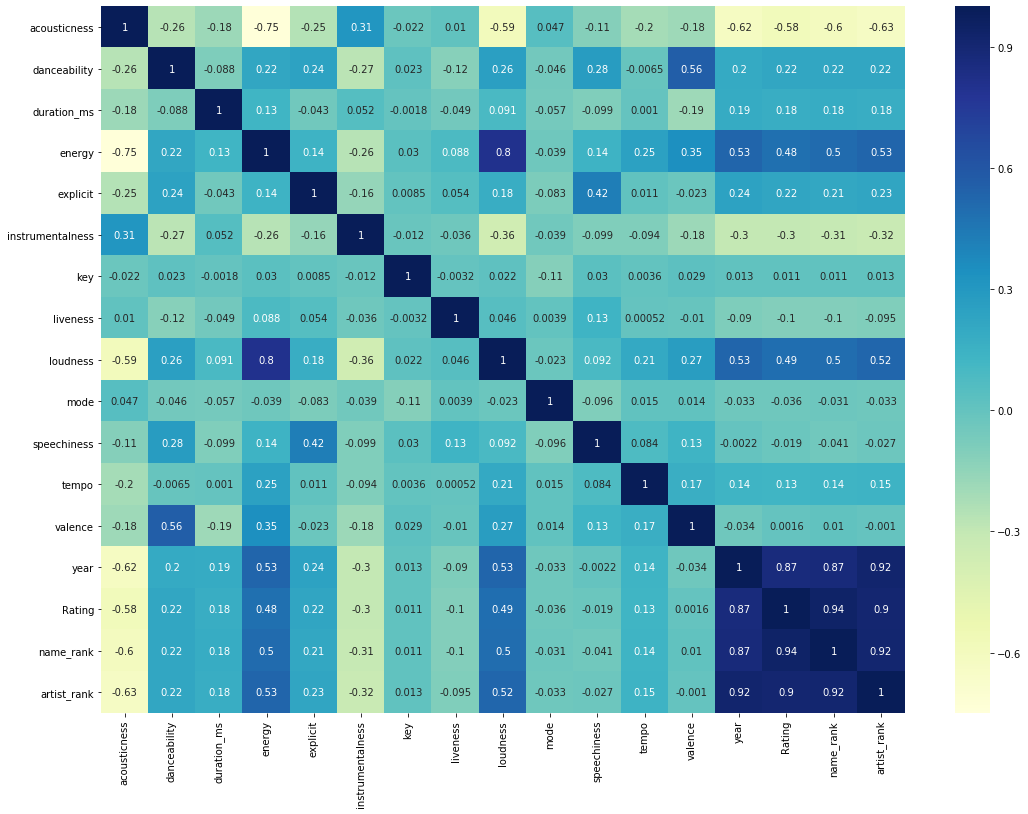

In [87]:
# Print the correlation matrix

plt.figure(figsize= (18,13))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")
b,t = plt.ylim()
b +=0.5
t -= 0.5
plt.ylim(b,t)
plt.show()

In [93]:
#Correlation with output variable
corr_target = abs(df.corr())['Rating']

#Selecting highly correlated features
corr_target[corr_target > 0.5]

acousticness    0.578761
year            0.866567
Rating          1.000000
name_rank       0.940488
artist_rank     0.904902
Name: Rating, dtype: float64

In [94]:
# Decreasing the threshold to get more features
corr_target[corr_target > 0.2]

acousticness        0.578761
danceability        0.219236
energy              0.483650
explicit            0.223264
instrumentalness    0.299281
loudness            0.490828
year                0.866567
Rating              1.000000
name_rank           0.940488
artist_rank         0.904902
Name: Rating, dtype: float64

Generally, a threshold of 0.5 is taken, but since we got only 5 features, so we decreased the threshold to get more number of features. Most important features according to Pearson Correlation are - acousticness, danceability, energy, explicit, instrumentalness, loudness, year, name_rank, artist_rank.

### <font color=Royalblue>Recursive Feature Elimination<font>

In [97]:
# Fit transform RFE with Random Boost

cols = list(x_train.columns)

rf = RandomForestClassifier()
rfe = RFE(rf, 10)             
x_rfe = rfe.fit_transform(x_train,y_train) 
rf.fit(x_rfe,y_train) 

temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print('Top 10 features are with RFE using RFE are :',selected_features_rfe)

Top 10 features are with RFE are : Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'loudness',
       'speechiness', 'tempo', 'year', 'name_rank', 'artist_rank'],
      dtype='object')


In [98]:
# Fit transform RFE with XGBoost

cols = list(x_train.columns)

xg = xgb.XGBClassifier(random_state=3)
rfe = RFE(xg, 10)             
x_rfe = rfe.fit_transform(x_train,y_train) 
rf.fit(x_rfe,y_train) 

temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print('Top 10 features are with RFE using XGBoost are :',selected_features_rfe)

Top 10 features are with RFE are : Index(['acousticness', 'duration_ms', 'energy', 'instrumentalness', 'loudness',
       'speechiness', 'tempo', 'year', 'name_rank', 'artist_rank'],
      dtype='object')


With RFE feature selection, most important features using both Random Forest and XGBoost are - acousticness, danceability, duration_ms, energy, explicit, instrumentalness, loudness, speechiness, year, name_rank, artist_rank.

### <font color=Royalblue>Select K Best<font>


In [96]:
selector = SelectKBest(chi2, k=10)
selector.fit_transform(x_train,y_train)
print('Top features with SelectKBest',x_train.columns[selector.get_support(indices=True)])

Top features with SelectKBest Index(['acousticness', 'energy', 'explicit', 'instrumentalness', 'loudness',
       'speechiness', 'tempo', 'year', 'name_rank', 'artist_rank'],
      dtype='object')


Top features with SelectKBest are - acousticness, energy, explicit, instrumentalness, loudness, speechiness, tempo, year, name_rank, artist_rank

Combining all three Feature Selection technique results, we see that acousticness, energy, explicit, instrumentalness, loudness, year, name_rank, artist_rank are the common features in all 3. Danceability is relevant in Pearson Correlation and RFE with Random Forest, where as Speechiness is relevant in RFE with XGBoost and SelectKBest. We will drop the remaining features like duration_ms and tempo which occur only once.

In [138]:
x_train = x_train[['acousticness', 'energy', 'explicit', 'instrumentalness', 'loudness','danceability','speechiness', 
                   'year', 'name_rank', 'artist_rank']]
x_test  = x_test[['acousticness', 'energy', 'explicit', 'instrumentalness', 'loudness','danceability','speechiness', 
                  'year', 'name_rank', 'artist_rank']]

## <font color=Royalblue>Random Forest<font>

In [139]:
# Fit train data on Random Forest Classifier

rf = RandomForestClassifier(random_state=3)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [140]:
# Print test accuracy score and F1 score

print('Random Forest accuracy score : ', round(accuracy_score(y_test,y_pred_rf)*100,3),'%')
print('Random Forest F1 score       : ', round(f1_score(y_test,y_pred_rf,average='weighted')*100,3),'%')

Random Forest accuracy score :  82.324 %
Random Forest F1 score       :  82.343 %


## <font color=Royalblue>XGBoost<font>

In [141]:
# Fit train data on XGBoost

xg = xgb.XGBClassifier(random_state=3)
xg.fit(x_train,y_train)
y_pred_xg = xg.predict(x_test)

In [142]:
# Print test accuracy score and F1 score

print('XGBoost accuracy score : ', round(accuracy_score(y_test,y_pred_xg)*100,3),'%')
print('XGBoost F1 score       : ', round(f1_score(y_test,y_pred_xg,average='weighted')*100,3),'%')

XGBoost accuracy score :  83.725 %
XGBoost F1 score       :  83.728 %


We are getting almost same results by training models with 10 audio features instead of 16. And our accuracy and F1 score stay the same. We will try to analyze our results for our final Model XGBoost with 10 features and best accuracy and F1 score.

In [143]:
# Print confusion matrix for XGBoost

conf_mx = confusion_matrix(y_test,y_pred_xg)
print(conf_mx)

[[11571   334    84    18     2     1     5     1     1     0]
 [  274  2984   368   110    22     2     0     0     0     0]
 [   70   363  5645   742   169    41     4     1     1     0]
 [   21   110   551  6959   696   146    18     4     1     0]
 [   11    56   162   695  7071   612    60     4     0     0]
 [    2    16    51   222   759  4738   249    11     0     0]
 [    0     5    15    59   188   485  2794    51     5     2]
 [    2     0     4     8    31    97   182   686     3     0]
 [    1     0     0     0     1     5    16    30    79     2]
 [    0     0     0     0     0     0     1     0     4     3]]


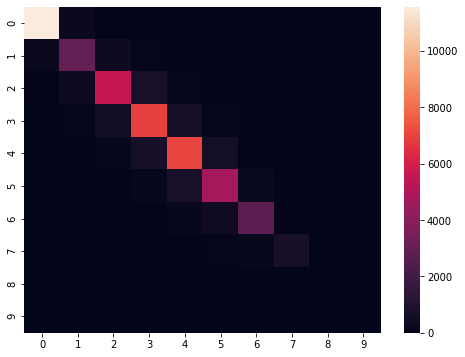

In [144]:
# It is difficult to analyze this confusion matrix, we will analyze it by visualization.

conf_mx = confusion_matrix(y_test,y_pred_xg)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mx)
b,t=plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.show()

Confusion matrix looks fairly good since most of the ratings are on the main diagonal, which means that they were classified correctly. Ratings 2,7,8,9 and 10 are darker than the others, which mean they have either been incorrectly classfied or there are lesser values for these digits in our dataset. We can verify if that's the case.

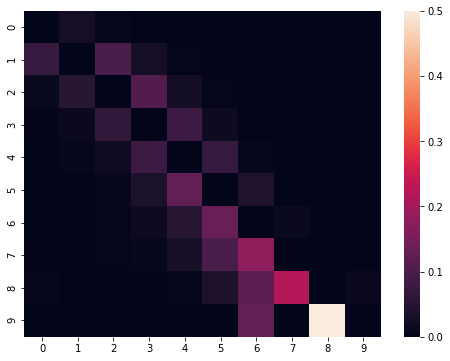

In [145]:
# Divide each value in confusion matrix by total values for that rating, so we can compare their error rates instead of
# absolute number of errors(which would make abundant classes look unfairly bad)

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_cm = conf_mx/row_sums
np.fill_diagonal(norm_cm, 0)
plt.figure(figsize=(8,6))
sns.heatmap(norm_cm)
b,t=plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.show()

We can thus infer that :
- Most of the classes which have a higher rating have comparatively higher number of errors compared to the classes with lower rating.
- For 10 rating, most of the songs have been classified as rating 9, but when we check in the confusion matrix, we see that total number of songs with rating 10 are 8, out of which 4 have been correctly classified, 3 have been classified as rating 9, and 1 has been classified as 8.
- Eventhough, we have multiple errors for almost all ratings, but we observe that most of the songs that are classified into wrong rating category eventually get classified into the category rating which is 1 lesser or 1 higher than the original. So, eventhough the overall accuracy could be less, but model is giving a pretty good idea of song popularity in the market.
    

# <font color=darkblue>CONCLUSION<font>

After trying out 4 differet algorithms, the best accuracy is achieved by XGBoost with both accuracy and F1 score of 83.4% followed by Random Forest. We applied multiple feature selection techniques but they did not have any visible effect on the overall model performance. There was an imbalance in the Dataset, so we implemented data balancing techniques. Where as undersampling performed extremely poor due to the fact that there wasn't enough data to learn from, oversampling gave good results. But nonetheless, our model had learned similar instances without any sampling.

Scope for Improvement : 
- We divided our popularity into 10 classes. Results could be more accurate by increasing the number of bins.
- We could convert artist and name column using other techniques like weight of evidence or Supervised ratio. These techniques transform the nominal variable to a single continuous one, whose values are correlated with the target label.
- We could use other models like Stochastic Gradient boosting, Adaboost or more ensemble models like Stacking, Bagging and Stacking CLassifiers.
- We could tune the parameters and see if the accuracy improves. Due to the limitation of resources, this wasn't implemneted successfully.

In Summary, this project helped in understanding the workflow of a Machine Learning Model and what are the different ways to try and find the best approach to build a more robust and efficient model.